In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv('../data/dataset.csv')

In [17]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [18]:
# drop cityCode and cityPartRange
df.drop(['cityCode', 'cityPartRange'], axis=1, inplace=True)
labelEncoder = LabelEncoder()

df['category'] = labelEncoder.fit_transform(df['category'])
print(dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_))))

{'Basic': 0, 'Luxury': 1}


In [19]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,0.126500
std,28774.37535,28.816696,0.499949,0.500015,28.889171,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,0.332429
min,89.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,0.000000
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,0.000000
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,0.000000
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,0.000000
max,99999.00000,100.000000,1.000000,1.000000,100.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07,1.000000


In [20]:
#  scale squareMeters, made, basement, attic, garage, price
scaler = StandardScaler()
df[['squareMeters', 'made', 'basement', 'attic', 'garage', 'price']] = scaler.fit_transform(df[['squareMeters', 'made', 'basement', 'attic', 'garage', 'price']])

df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,0.891562,3,0,1,63,8,-0.052484,0,1,-0.250333,1.374130,1.537488,0,7,0.891687,0
1,1.073956,39,1,1,98,6,1.021904,1,0,-0.479772,-0.895592,-1.622370,1,2,1.074814,1
2,0.203033,58,0,1,19,8,1.666537,0,0,-0.728678,1.321265,-1.595657,1,9,0.201994,0
3,-0.610092,47,0,0,6,4,0.699588,0,1,-1.520589,0.730080,-0.740816,0,3,-0.611997,0
4,0.714521,19,1,1,90,7,-1.664066,1,0,1.182616,-0.898010,-0.996505,1,4,0.716512,1


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

x = df.drop('category', axis=1)
y = df['category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/Users/irakozeben/Desktop/lastlast/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
print(x_train.columns)


Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement',
       'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price'],
      dtype='object')


In [23]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[earlyStopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7982 - loss: 0.8943 - val_accuracy: 0.8720 - val_loss: 0.4359
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8734 - loss: 0.4232 - val_accuracy: 0.8720 - val_loss: 0.4209
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8751 - loss: 0.4151 - val_accuracy: 0.8720 - val_loss: 0.4038
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8790 - loss: 0.3908 - val_accuracy: 0.8720 - val_loss: 0.3929
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8768 - loss: 0.3906 - val_accuracy: 0.8720 - val_loss: 0.3891
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8812 - loss: 0.3647 - val_accuracy: 0.8720 - val_loss: 0.3648
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8713 - loss: 0.3532 - val_accuracy: 0.8765 - val_loss: 0.2577
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8938 - loss: 0.2736 - val_accu

In [24]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.3796e-04


[0.00031511555425822735, 1.0]

In [26]:
# 1.073956	39	1	1	98	6	1.021904	1	0	-0.479772	-0.895592	-1.622370	1	2	1.074814	1
testing = pd.DataFrame([[1.073956, 39, 1, 1, 98, 6, 1.021904, 1, 0, -0.479772, -0.895592, -1.622370, 1, 2, 1.074814]])
Prediction = model.predict(testing)[0][0]
PredictionText = 'Luxury' if Prediction > 0.5 else 'Basic'
print(Prediction, PredictionText)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1.0 Luxury


In [28]:
model.save("../models/house_model.h5")


In [14]:
model.save("house_model.h5")

In [36]:
import joblib

# Save the trained model to 'models/house_category.pkl'
joblib.dump(model.fit, '../models/house_category.pkl')
print("Model saved as 'house_category.pkl' in the 'models' folder.")

Model saved as 'house_category.pkl' in the 'models' folder.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


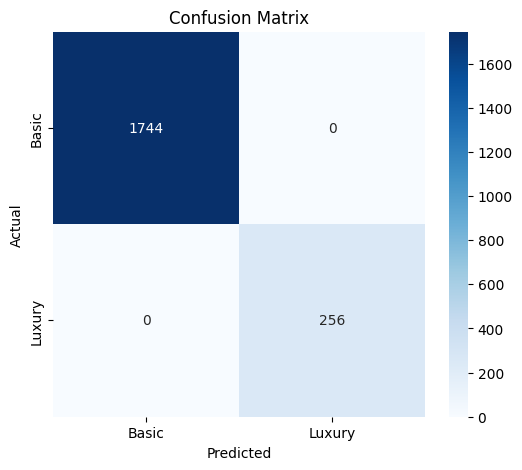

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the categories for the test set
y_pred = (model.predict(x_test) > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Basic', 'Luxury'], yticklabels=['Basic', 'Luxury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)  # Assuming X_train is your training data
joblib.dump(scaler, '../models/scaler.pkl')  # Save the scaler


['../models/scaler.pkl']

In [45]:
import joblib

scaler = joblib.load("../models/scaler.pkl")  # Replace "scaler.pkl" with your scaler's file path


In [49]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Example training
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Save the model
with open('../models/house_ccategory.pkl', 'wb') as f:
    pickle.dump(model, f)


In [51]:
# Assuming the model is loaded
print(model.feature_names_in_)  # If the model supports this attribute


['squareMeters' 'numberOfRooms' 'hasYard' 'hasPool' 'floors'
 'numPrevOwners' 'made' 'isNewBuilt' 'hasStormProtector' 'basement'
 'attic' 'garage' 'hasStorageRoom' 'hasGuestRoom' 'price']
